<a href="https://colab.research.google.com/github/Lakshmitejasri/Machine-Learning/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


Load the dataset

In [2]:
file_path = "/content/kc_house_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset


In [3]:
print("Original Dataset:")
print(df.head())


Original Dataset:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipco

# Data preprocessing
For simplicity, we'll only consider a few relevant features



In [4]:
selected_features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'grade', 'condition', 'price']
df = df[selected_features]

# Handling missing values

In [5]:
df.dropna(inplace=True)


# Handling outliers
Assuming 'price' is the target variable

In [6]:
df = df[df['price'] < 1e7]  # Removing rows with extremely high prices as outliers

# Encoding categorical variables (if applicable)
Example assumes 'condition' is a categorical variable



In [7]:
df = pd.get_dummies(df, columns=['condition'], drop_first=True)

# Feature scaling



In [8]:
scaler = StandardScaler()
df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'grade']] = scaler.fit_transform(
    df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'grade']])

# Define features (X) and target variable (y)


In [9]:

X = df.drop("price", axis=1)
y = df["price"]


# Split the data into training and testing sets



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model





In [11]:
model = LinearRegression()

# Train the model



In [12]:
model.fit(X_train, y_train)

LinearRegression()

# Make predictions on the test set

In [13]:
y_pred = model.predict(X_test)

# Evaluate the model




In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 65853150486.78489
R-squared: 0.5643961989668278


#visualization

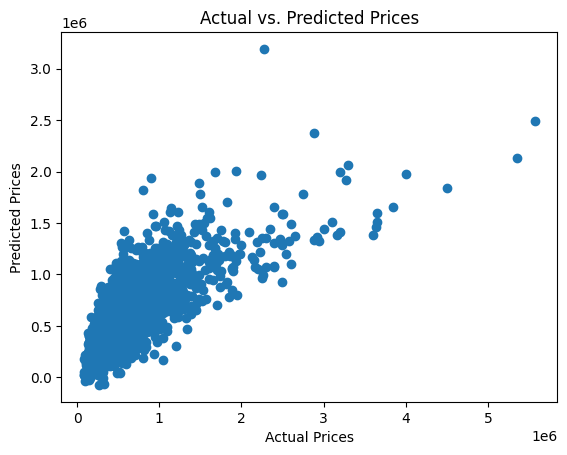

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()


# Residual plot

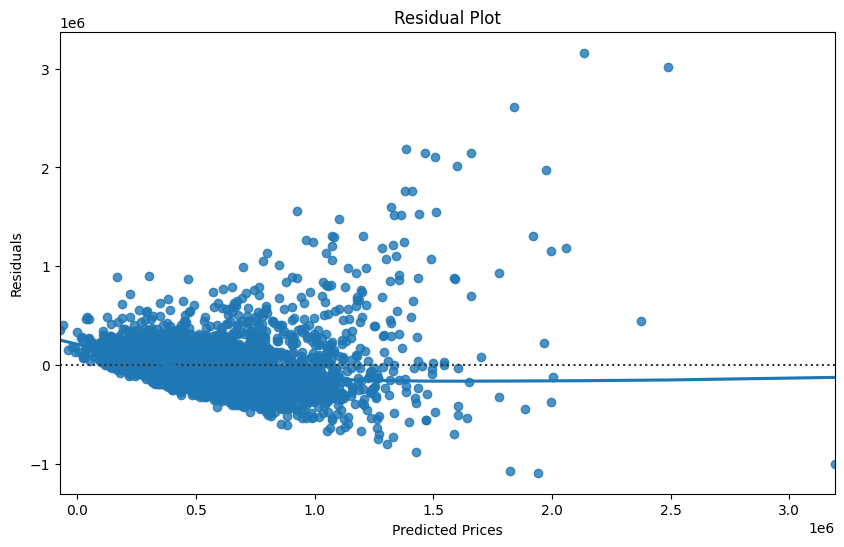

In [17]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test, lowess=True)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# Distribution of residuals

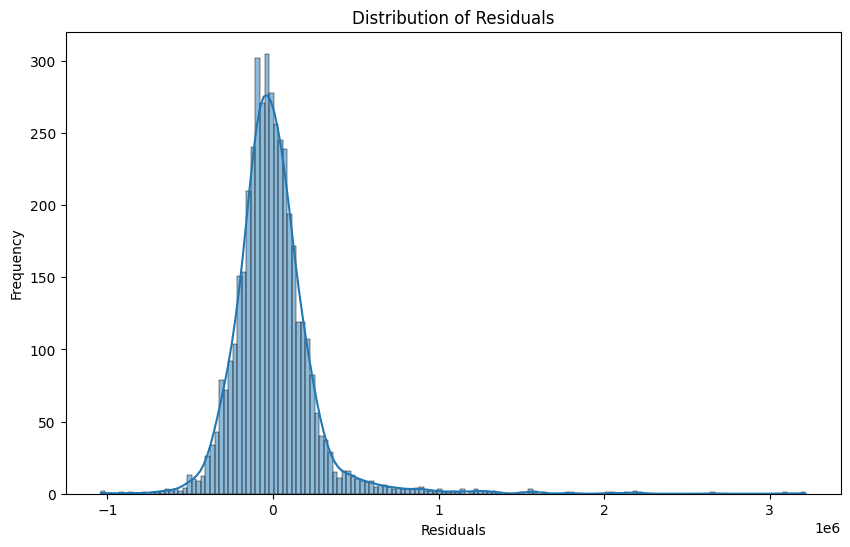

In [18]:

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


# Feature importance plot

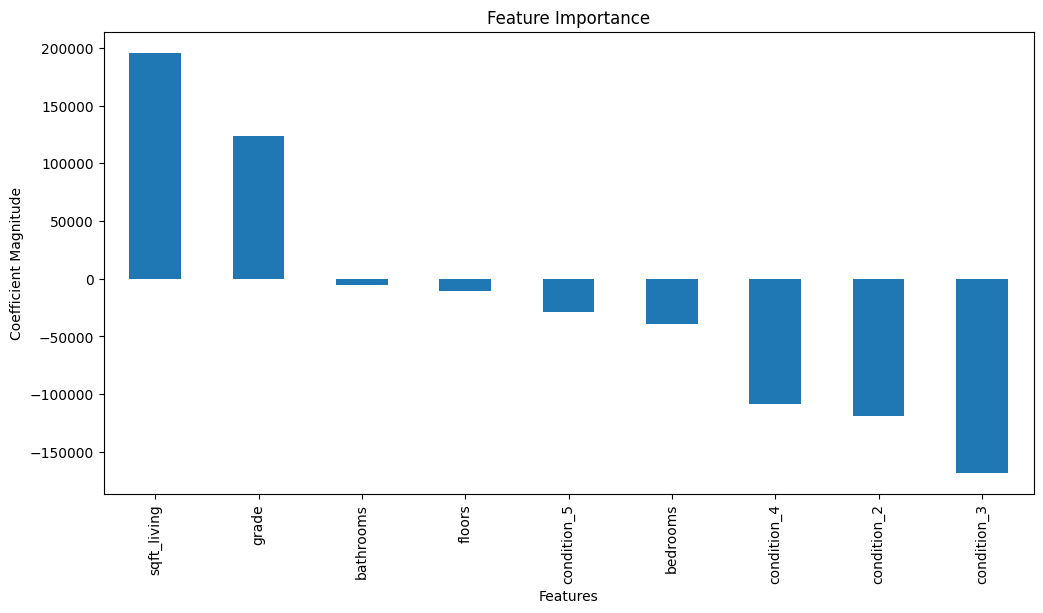

In [20]:
import matplotlib.pyplot as plt

if hasattr(model, 'coef_'):
    feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    feature_importance.plot(kind='bar')
    plt.title("Feature Importance")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Magnitude")
    plt.show()